In [34]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../Class")
sys.path.append("../utils")

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss, LogSoftMaxCrossEntropy
from transformations import TanH, SoftMax, ReLU 
from encapsulage import Sequential, Optim
from AutoEncoder import AutoEncoder
from sklearn.datasets import fetch_openml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PAS FINI

/Library/Python/3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1, Loss: 333.1316


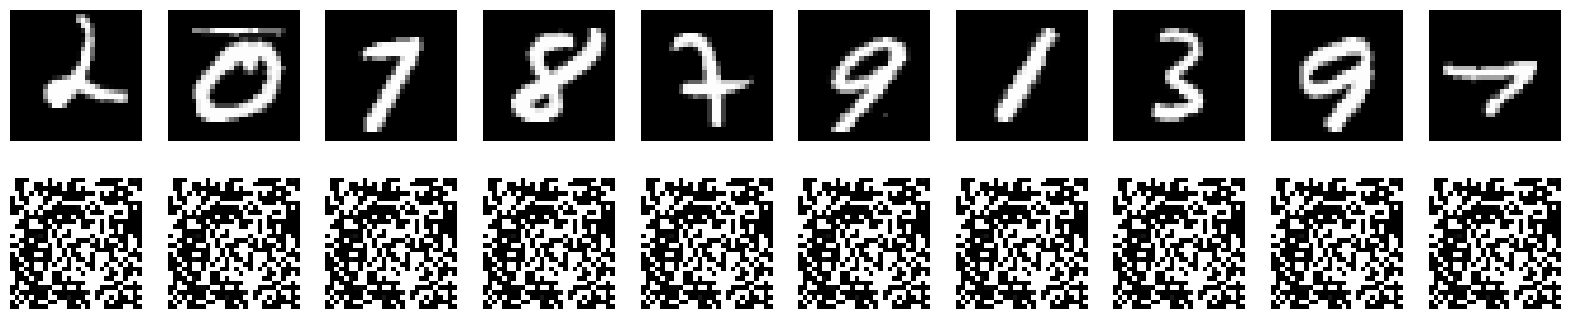

Epoch 2, Loss: 302.6763


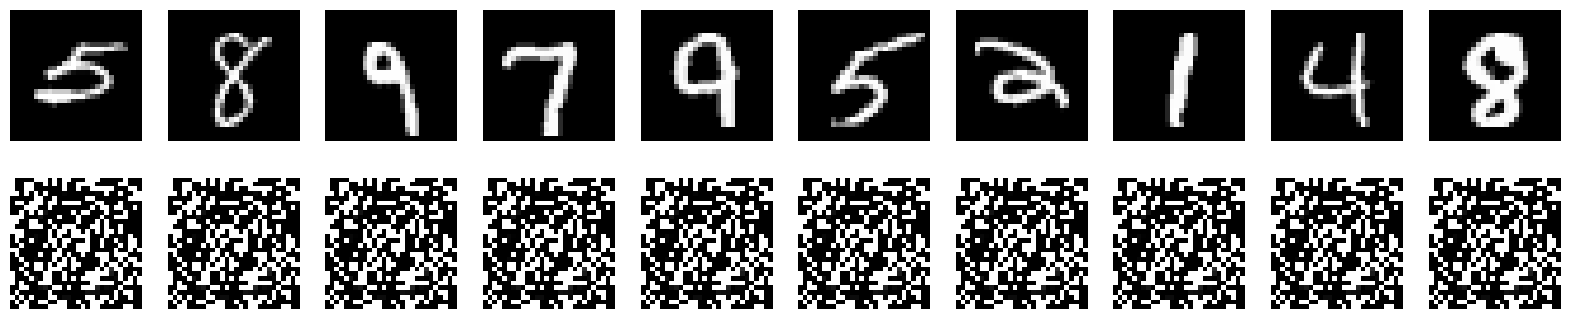

Epoch 3, Loss: 282.4808


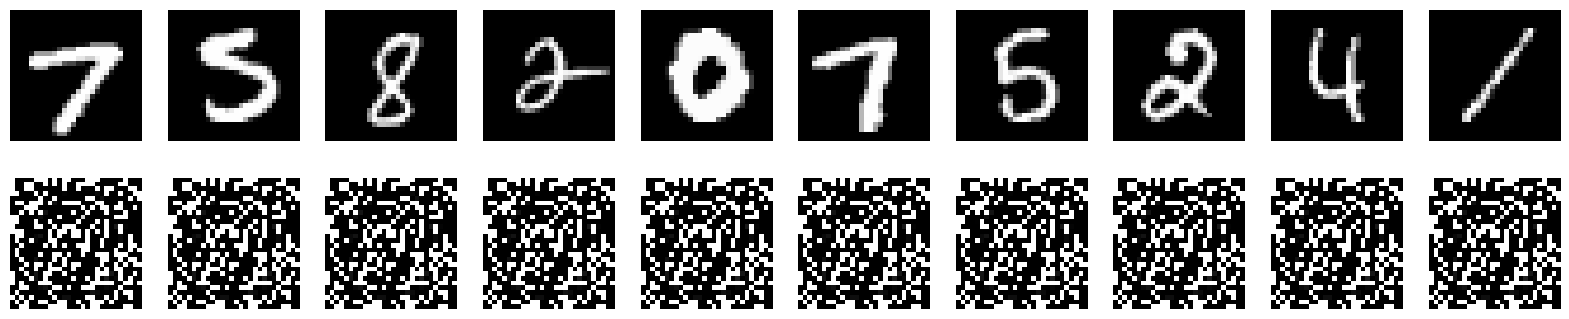

Epoch 4, Loss: 263.4500


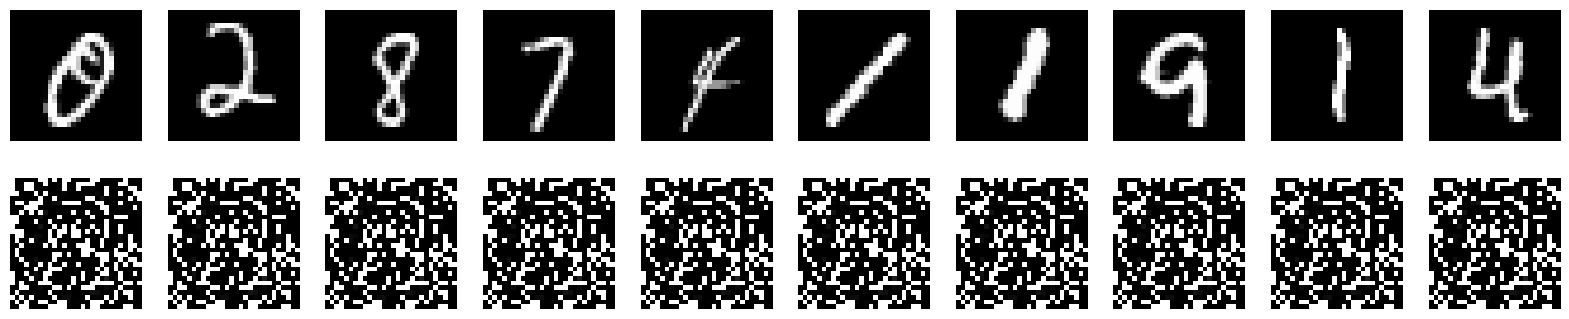

Epoch 5, Loss: 259.4004


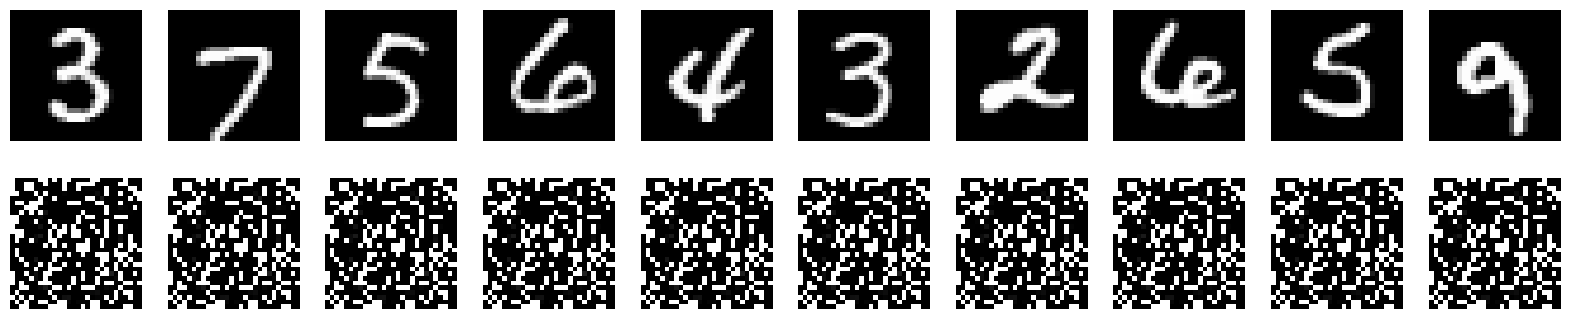

Epoch 6, Loss: 254.8344


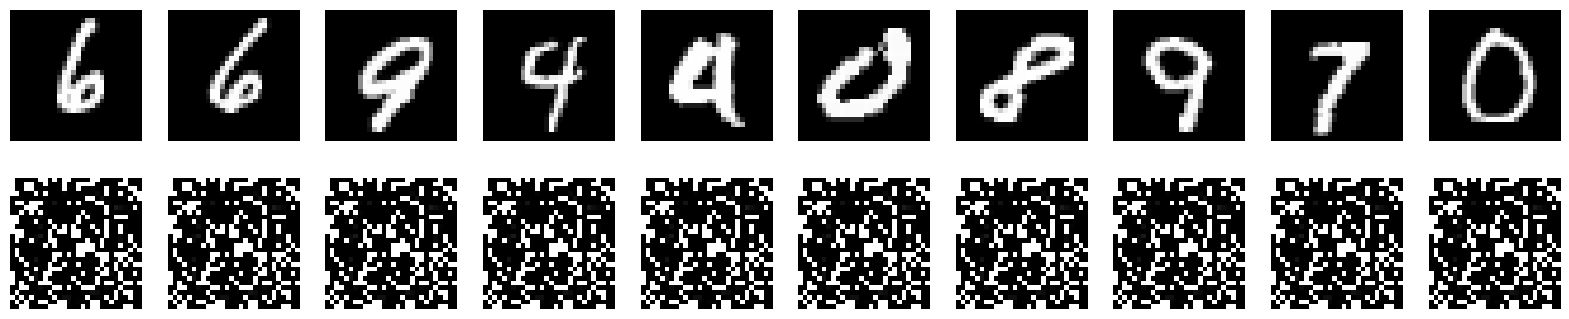

Epoch 7, Loss: 246.2255


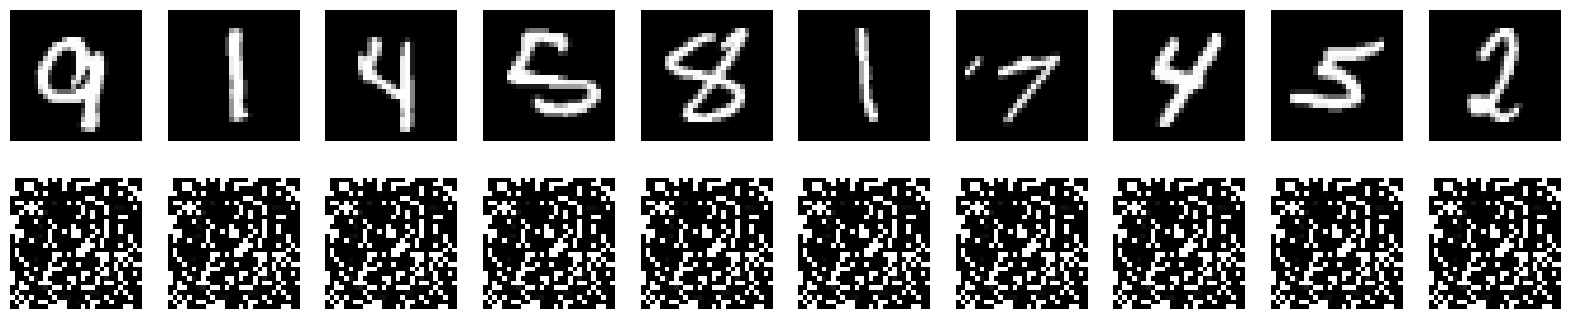

Epoch 8, Loss: 244.8048


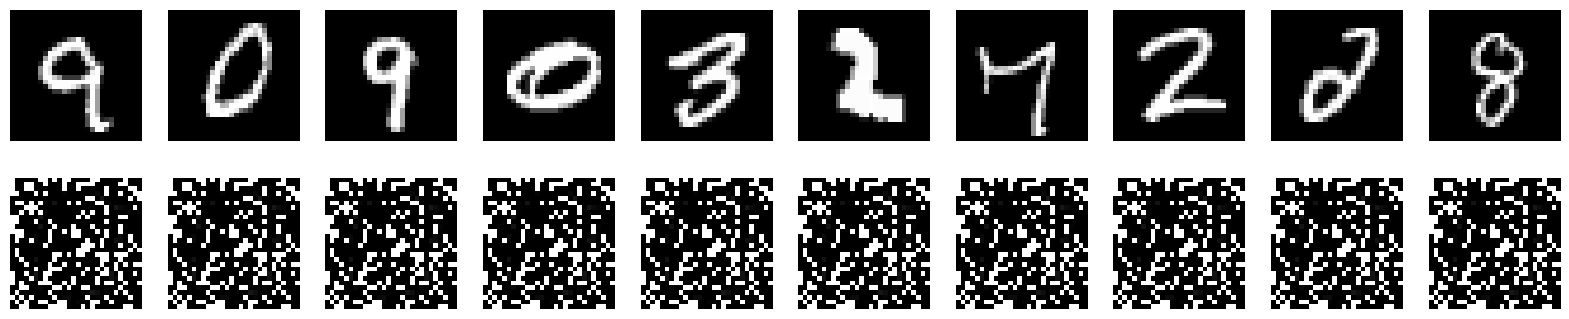

Epoch 9, Loss: 241.8073


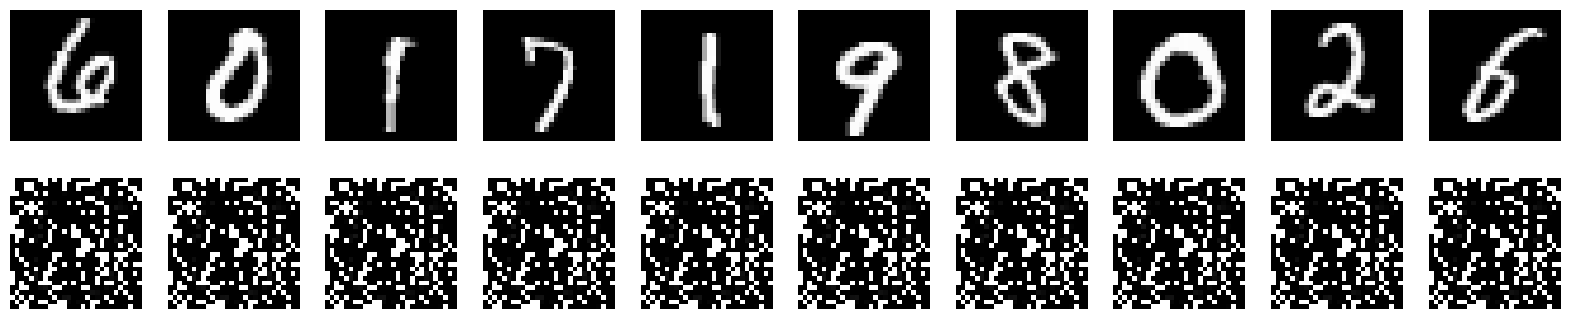

Epoch 10, Loss: 240.7450


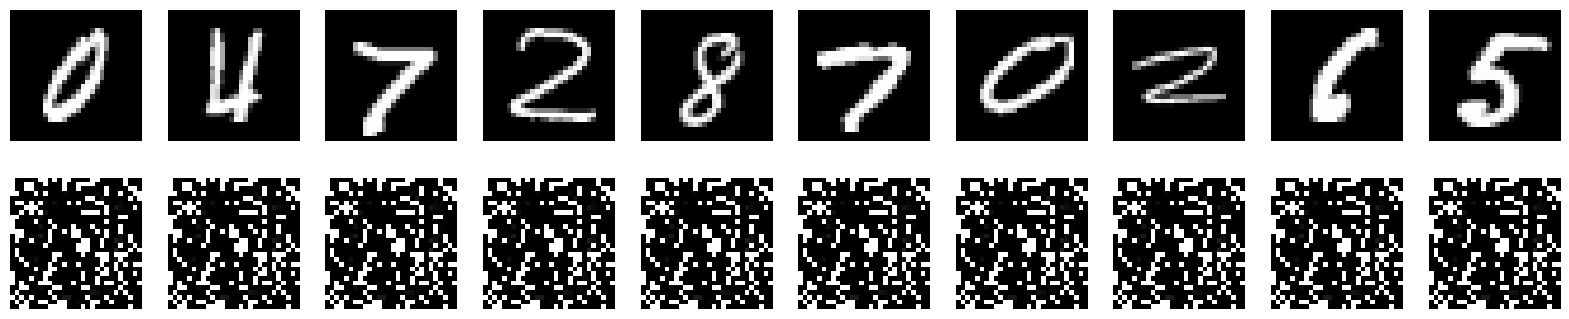

In [37]:

def train_and_visualize(autoencoder, optimizer, X_train, batch_size, epochs, display_num=10):
    for epoch in range(epochs):
        np.random.shuffle(X_train)
       
        for start_idx in range(0, len(X_train), batch_size):
            end_idx = min(start_idx + batch_size, len(X_train))
            batch_x = X_train[start_idx:end_idx]

            
            loss = optimizer.step(batch_x, batch_x)
        
        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

        # reconstruct les images apres chaque epoch

        test_images = X_train[:display_num]
        reconstructed_images = autoencoder.forward(test_images)

        fig, axes = plt.subplots(2, display_num, figsize=(20, 4))
        for i in range(display_num):
            axes[0, i].imshow(test_images[i].reshape(28, 28), cmap='gray')
            axes[0, i].axis('off')
            axes[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
            axes[1, i].axis('off')
        plt.show()



autoencoder = AutoEncoder(DIM_IN=784, fc_act=TanH())
full_autoencoder = Sequential(
            *autoencoder.encoder.modules,
            *autoencoder.decoder.modules
        )
optimizer = Optim(full_autoencoder, MSELoss(), 1e-3)

# MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values.astype('float32') / 255
X = X.reshape(-1, 784)

X_train = X[:60000]

train_and_visualize(autoencoder, optimizer, X_train, batch_size=256, epochs=10)
